In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('stock_tweets.csv')

In [3]:
df.head()

,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."


In [4]:
df['Stock Name'].unique()

array(['TSLA', 'MSFT', 'PG', 'META', 'AMZN', 'GOOG', 'AMD', 'AAPL',
       'NFLX', 'TSM', 'KO', 'F', 'COST', 'DIS', 'VZ', 'CRM', 'INTC', 'BA',
       'BX', 'NOC', 'PYPL', 'ENPH', 'NIO', 'ZS', 'XPEV'], dtype=object)

In [5]:
df.shape

(80793, 4)

In [6]:
df.describe()

,Date,Tweet,Stock Name,Company Name
count,80793,80793,80793,80793
unique,64424,64479,25,25
top,2022-07-07 18:32:41+00:00,$TSLA will triple in 2022 🚀🌕,TSLA,"Tesla, Inc."
freq,14,25,37422,37422


In [7]:
df.columns

Index(['Date', 'Tweet', 'Stock Name', 'Company Name'], dtype='object')

In [8]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#import unicodedata

In [9]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\anike\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [10]:
analyzer = SentimentIntensityAnalyzer()

In [11]:
def get_sentiment(text):
    sentiment = analyzer.polarity_scores(str(text))  
    return pd.Series([sentiment['compound'], sentiment['neg'], sentiment['neu'], sentiment['pos']])



In [12]:
df[['sentiment_score', 'Negative', 'Neutral', 'Positive']] = df['Tweet'].apply(get_sentiment)

In [13]:
df.head()

,Date,Tweet,Stock Name,Company Name,sentiment_score,Negative,Neutral,Positive
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",0.0772,0.127,0.758,0.115
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",0.0000,0.000,1.000,0.000
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",0.2960,0.000,0.951,0.049
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",-0.7568,0.273,0.590,0.137
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",-0.8750,0.526,0.474,0.000


In [14]:
 df['Stock Name'].unique()

array(['TSLA', 'MSFT', 'PG', 'META', 'AMZN', 'GOOG', 'AMD', 'AAPL',
       'NFLX', 'TSM', 'KO', 'F', 'COST', 'DIS', 'VZ', 'CRM', 'INTC', 'BA',
       'BX', 'NOC', 'PYPL', 'ENPH', 'NIO', 'ZS', 'XPEV'], dtype=object)

## Take "AMAZON" as example stock

In [16]:
stock_name = 'AMZN'

In [17]:
amzn_df = df[df['Stock Name'] == stock_name].copy()

In [18]:
amzn_df

,Date,Tweet,Stock Name,Company Name,sentiment_score,Negative,Neutral,Positive
48351,2022-09-29 22:40:47+00:00,A group of lawmakers led by Sen. Elizabeth War...,AMZN,"Amazon.com, Inc.",-0.0772,0.084,0.841,0.075
48352,2022-09-29 22:23:54+00:00,$NIO just because I'm down money doesn't mean ...,AMZN,"Amazon.com, Inc.",0.2500,0.158,0.684,0.158
48353,2022-09-29 18:34:51+00:00,Today’s drop in $SPX is a perfect example of w...,AMZN,"Amazon.com, Inc.",-0.3182,0.164,0.728,0.108
48354,2022-09-29 15:57:59+00:00,Druckenmiller owned $CVNA this year \nMunger b...,AMZN,"Amazon.com, Inc.",0.2382,0.065,0.851,0.083
48355,2022-09-29 15:10:30+00:00,Top 10 $QQQ Holdings \n\nAnd Credit Rating\n\n...,AMZN,"Amazon.com, Inc.",0.7783,0.000,0.799,0.201
...,...,...,...,...,...,...,...,...
52435,2021-09-30 20:50:16+00:00,My top 10 holdings make up 66% of my portfolio...,AMZN,"Amazon.com, Inc.",0.4515,0.000,0.928,0.072
52436,2021-09-30 19:45:13+00:00,Amazon $AMZN has 4X the market cap of Alibaba ...,AMZN,"Amazon.com, Inc.",-0.5106,0.095,0.873,0.032
52437,2021-09-30 18:01:19+00:00,Returns over the last 10 Years:\n\nBitcoin $BT...,AMZN,"Amazon.com, Inc.",-0.2263,0.089,0.821,0.091
52438,2021-09-30 17:56:14+00:00,Great snapshot of what it looks like when an i...,AMZN,"Amazon.com, Inc.",0.9369,0.000,0.740,0.260


In [19]:
amzn_df['Date'] = pd.to_datetime(amzn_df['Date'])

In [20]:
amzn_df['Date'] = amzn_df['Date'].dt.date

In [21]:
amzn_df.head()

,Date,Tweet,Stock Name,Company Name,sentiment_score,Negative,Neutral,Positive
48351,2022-09-29,A group of lawmakers led by Sen. Elizabeth War...,AMZN,"Amazon.com, Inc.",-0.0772,0.084,0.841,0.075
48352,2022-09-29,$NIO just because I'm down money doesn't mean ...,AMZN,"Amazon.com, Inc.",0.2500,0.158,0.684,0.158
48353,2022-09-29,Today’s drop in $SPX is a perfect example of w...,AMZN,"Amazon.com, Inc.",-0.3182,0.164,0.728,0.108
48354,2022-09-29,Druckenmiller owned $CVNA this year \nMunger b...,AMZN,"Amazon.com, Inc.",0.2382,0.065,0.851,0.083
48355,2022-09-29,Top 10 $QQQ Holdings \n\nAnd Credit Rating\n\n...,AMZN,"Amazon.com, Inc.",0.7783,0.000,0.799,0.201


In [22]:
#amzn_df = amzn_df.drop(columns=['Negative', 'Positive', 'Neutral', 'Stock Name', 'Company Name'])

In [23]:
amzn_df.head()

,Date,Tweet,Stock Name,Company Name,sentiment_score,Negative,Neutral,Positive
48351,2022-09-29,A group of lawmakers led by Sen. Elizabeth War...,AMZN,"Amazon.com, Inc.",-0.0772,0.084,0.841,0.075
48352,2022-09-29,$NIO just because I'm down money doesn't mean ...,AMZN,"Amazon.com, Inc.",0.2500,0.158,0.684,0.158
48353,2022-09-29,Today’s drop in $SPX is a perfect example of w...,AMZN,"Amazon.com, Inc.",-0.3182,0.164,0.728,0.108
48354,2022-09-29,Druckenmiller owned $CVNA this year \nMunger b...,AMZN,"Amazon.com, Inc.",0.2382,0.065,0.851,0.083
48355,2022-09-29,Top 10 $QQQ Holdings \n\nAnd Credit Rating\n\n...,AMZN,"Amazon.com, Inc.",0.7783,0.000,0.799,0.201


In [24]:
daily_sentiment = amzn_df.groupby('Date').mean(numeric_only=True)

In [25]:
daily_sentiment.head()

,sentiment_score,Negative,Neutral,Positive
Date,,,,
2021-09-30,0.246480,0.036800,0.824200,0.139200
2021-10-01,0.359337,0.021875,0.863750,0.114375
2021-10-02,-0.000700,0.056333,0.846667,0.097000
2021-10-03,0.834400,0.000000,0.830000,0.170000
2021-10-04,0.258650,0.015583,0.883750,0.100583


In [26]:
all_stocks = pd.read_csv('stock_yfinance_data.csv')
print(all_stocks.shape)
all_stocks.head()

(6300, 8)


,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA


In [27]:
stock_df = all_stocks[all_stocks['Stock Name'] == 'AMZN']

In [28]:
stock_df

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
1008,2021-09-30,165.800003,166.392502,163.699493,164.251999,164.251999,56848000,AMZN
1009,2021-10-01,164.450500,165.458496,162.796997,164.162994,164.162994,56712000,AMZN
1010,2021-10-04,163.969498,163.999496,158.812500,159.488998,159.488998,90462000,AMZN
1011,2021-10-05,160.225006,163.036499,160.123001,161.050003,161.050003,65384000,AMZN
1012,2021-10-06,160.676498,163.216995,159.931000,163.100494,163.100494,50660000,AMZN
...,...,...,...,...,...,...,...,...
1255,2022-09-23,116.000000,116.050003,112.059998,113.779999,113.779999,65126700,AMZN
1256,2022-09-26,113.300003,117.339996,113.129997,115.150002,115.150002,62723300,AMZN
1257,2022-09-27,117.199997,118.320000,113.050003,114.410004,114.410004,60094700,AMZN
1258,2022-09-28,114.379997,118.699997,113.800003,118.010002,118.010002,55763800,AMZN


In [29]:
stock_df['Date'] = pd.to_datetime(stock_df['Date'])

C:\Users\anike\AppData\Local\Temp\ipykernel_12124\3629404903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df['Date'] = pd.to_datetime(stock_df['Date'])


In [30]:
stock_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
1008,2021-09-30,165.800003,166.392502,163.699493,164.251999,164.251999,56848000,AMZN
1009,2021-10-01,164.450500,165.458496,162.796997,164.162994,164.162994,56712000,AMZN
1010,2021-10-04,163.969498,163.999496,158.812500,159.488998,159.488998,90462000,AMZN
1011,2021-10-05,160.225006,163.036499,160.123001,161.050003,161.050003,65384000,AMZN
1012,2021-10-06,160.676498,163.216995,159.931000,163.100494,163.100494,50660000,AMZN


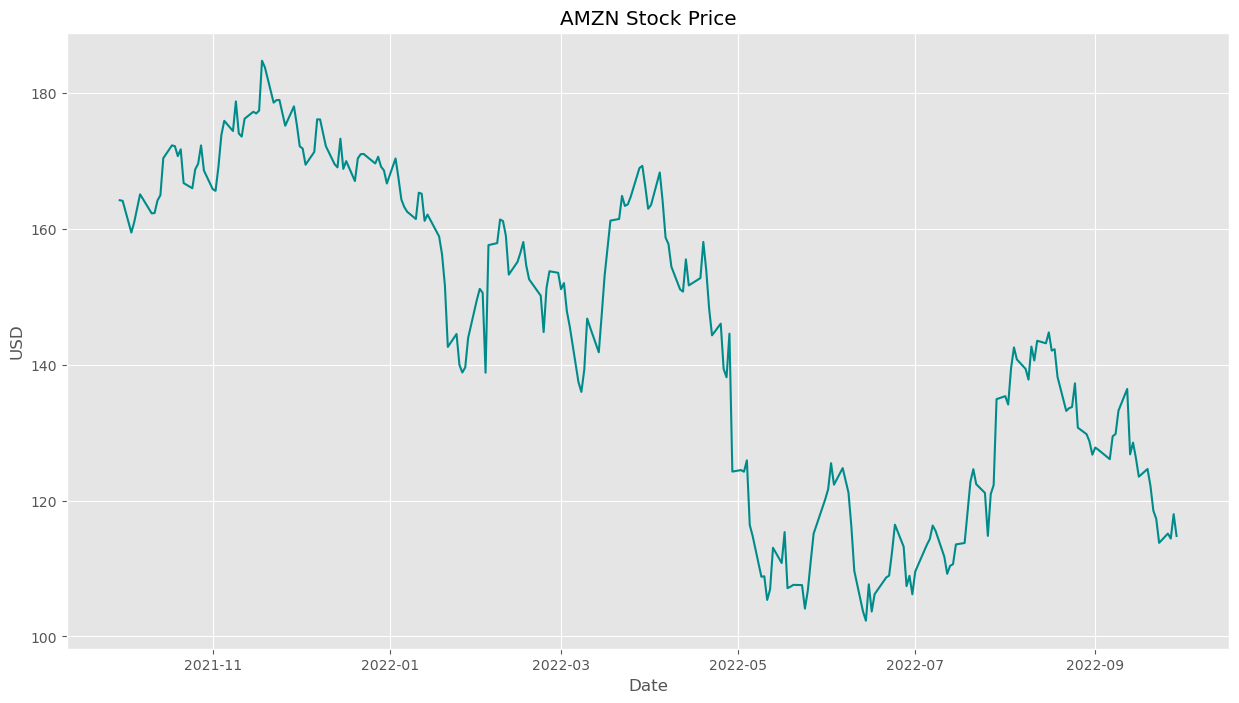

In [31]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(stock_df['Date'], stock_df['Close'], color='#008B8B')
ax.set(xlabel="Date", ylabel="USD", title=f"{stock_name} Stock Price")
plt.show()

In [32]:
def get_tech_ind(d):
    data=d.copy()
    data['MA7'] = data.iloc[:,4].rolling(window=7).mean() #Close column
    data['MA20'] = data.iloc[:,4].rolling(window=20).mean() #Close Column
    data['MA10'] = data['Close'].rolling(window=10).mean()

    data['MACD'] = data.iloc[:,4].ewm(span=26).mean() - data.iloc[:,1].ewm(span=12,adjust=False).mean()
    #This is the difference of Closing price and Opening Price

    # Create Bollinger Bands
    data['20SD'] = data.iloc[:, 4].rolling(20).std()
    data['upper_band'] = data['MA20'] + (data['20SD'] * 2)
    data['lower_band'] = data['MA20'] - (data['20SD'] * 2)

    # Create Exponential moving average
    data['EMA'] = data.iloc[:,4].ewm(com=0.5).mean()

    # Create LogMomentum
    data['logmomentum'] = np.log(data.iloc[:,4] - 1)

    return data

In [33]:
tech_df = get_tech_ind(stock_df)
stock_df = tech_df.iloc[20:,:].reset_index(drop=True)
stock_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name,MA7,MA20,MA10,MACD,20SD,upper_band,lower_band,EMA,logmomentum
0,2021-10-28,170.104996,173.949997,169.300003,172.328506,172.328506,114174000,AMZN,169.436571,166.614751,170.105151,-0.644339,4.111286,174.837323,158.392179,171.261756,5.143583
1,2021-10-29,165.001007,168.740997,163.666000,168.621506,168.621506,129722000,AMZN,169.132071,166.837676,169.922202,-0.040452,4.092180,175.022037,158.653316,169.501589,5.121708
2,2021-11-01,168.089996,168.792999,164.600998,165.905502,165.905502,72178000,AMZN,168.297071,167.158501,169.279051,-0.243565,3.720357,174.599216,159.717786,167.104198,5.105373
3,2021-11-02,165.750504,166.556000,164.177505,165.637497,165.637497,52552000,AMZN,168.134214,167.387876,168.622050,-0.088001,3.455945,174.299767,160.475986,166.126397,5.103746
4,2021-11-03,165.449997,169.746002,164.876007,169.199997,169.199997,67944000,AMZN,168.588715,167.692851,168.466750,0.389213,3.324309,174.341469,161.044234,168.175464,5.125154


In [34]:
def tech_ind(dataset):
    fig,ax = plt.subplots(figsize=(15, 8), dpi = 200)
    x_ = range(3, dataset.shape[0])
    x_ = list(dataset.index)

    ax.plot(dataset['Date'], dataset['MA7'], label='Moving Average (7 days)', color='g', linestyle='--')
    ax.plot(dataset['Date'], dataset['Close'], label='Closing Price', color='#6A5ACD')
    ax.plot(dataset['Date'], dataset['MA20'], label='Moving Average (20 days)', color='r', linestyle='-.')
    plt.title('Technical indicators')
    plt.ylabel('Close (USD)')
    plt.xlabel("Year")
    plt.legend()

    plt.show()

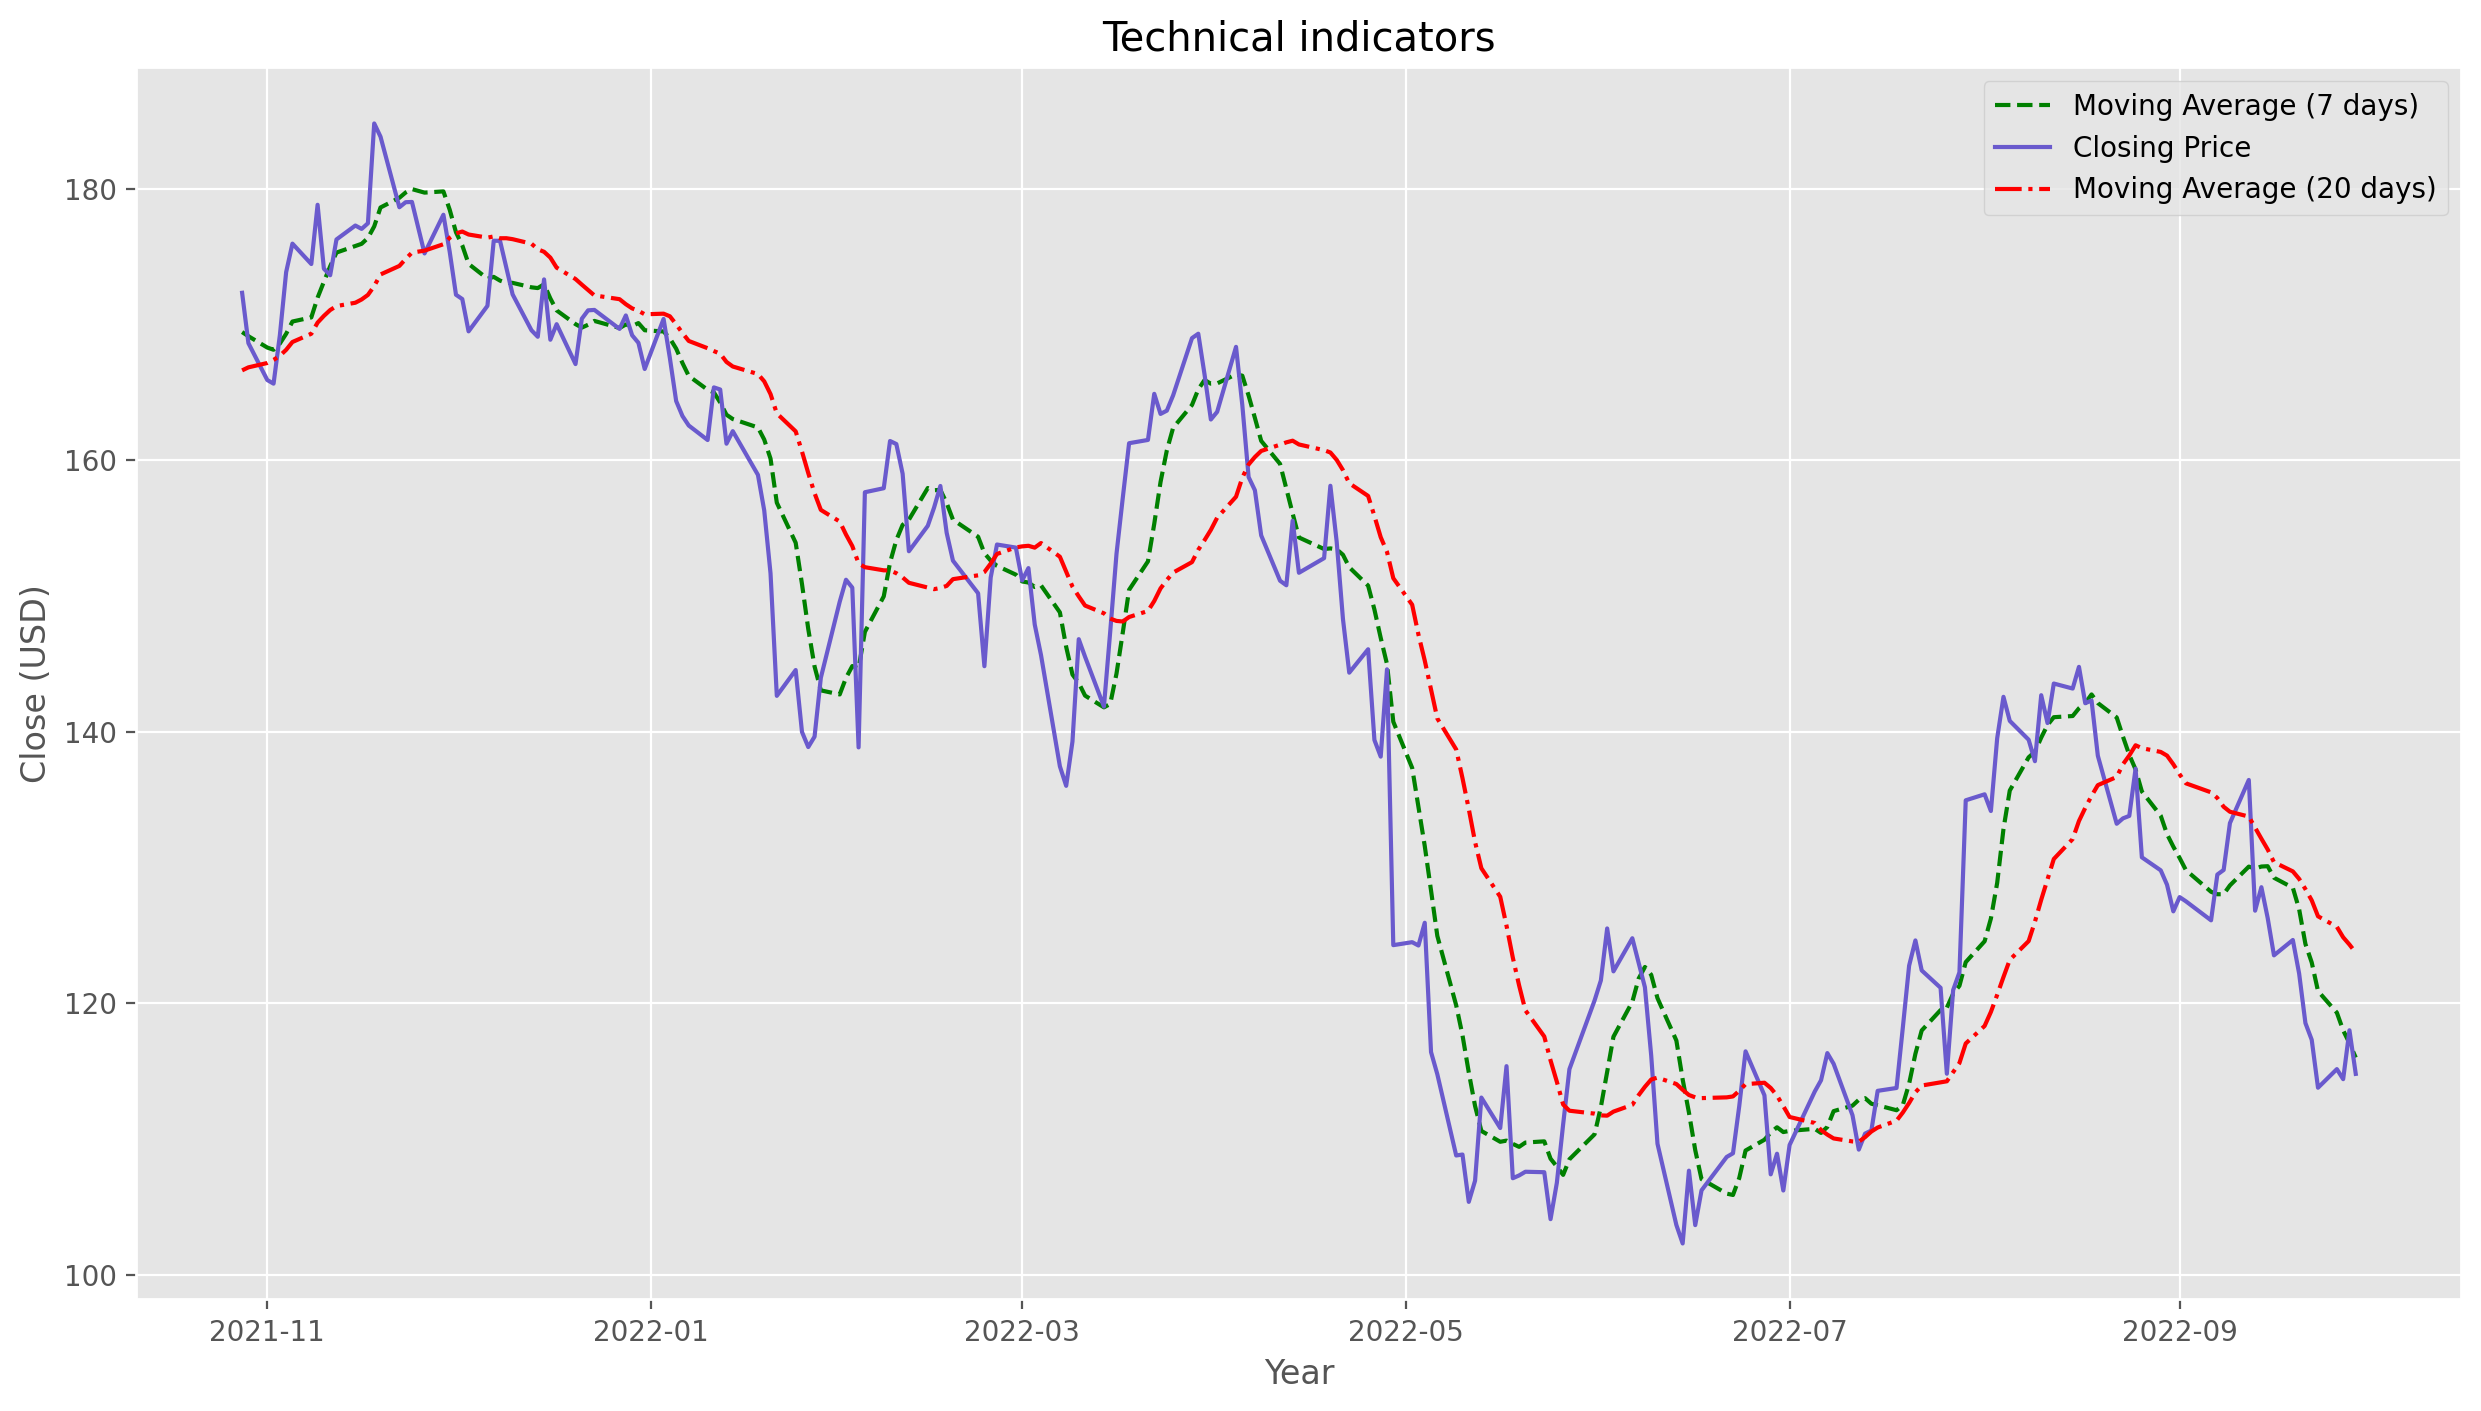

In [35]:
tech_ind(stock_df)

In [36]:
stock_df.set_index('Date', inplace=True)

In [37]:
merged_df = stock_df.merge(daily_sentiment, left_index=True, right_index=True, how='inner')


In [38]:
merged_df.head()

,Open,High,Low,Close,Adj Close,Volume,Stock Name,MA7,MA20,MA10,MACD,20SD,upper_band,lower_band,EMA,logmomentum,sentiment_score,Negative,Neutral,Positive
Date,,,,,,,,,,,,,,,,,,,,
2021-10-28,170.104996,173.949997,169.300003,172.328506,172.328506,114174000,AMZN,169.436571,166.614751,170.105151,-0.644339,4.111286,174.837323,158.392179,171.261756,5.143583,-0.001450,0.068295,0.850636,0.081023
2021-10-29,165.001007,168.740997,163.666000,168.621506,168.621506,129722000,AMZN,169.132071,166.837676,169.922202,-0.040452,4.092180,175.022037,158.653316,169.501589,5.121708,0.140447,0.059438,0.853000,0.087563
2021-11-01,168.089996,168.792999,164.600998,165.905502,165.905502,72178000,AMZN,168.297071,167.158501,169.279051,-0.243565,3.720357,174.599216,159.717786,167.104198,5.105373,0.369745,0.017364,0.876727,0.105818
2021-11-02,165.750504,166.556000,164.177505,165.637497,165.637497,52552000,AMZN,168.134214,167.387876,168.622050,-0.088001,3.455945,174.299767,160.475986,166.126397,5.103746,0.336614,0.060286,0.808714,0.130857
2021-11-03,165.449997,169.746002,164.876007,169.199997,169.199997,67944000,AMZN,168.588715,167.692851,168.466750,0.389213,3.324309,174.341469,161.044234,168.175464,5.125154,0.260729,0.019143,0.871571,0.109286


In [39]:
correlation = merged_df.select_dtypes(include='number').corr()
print(correlation['Close'].sort_values(ascending=False))


Close              1.000000
Adj Close          1.000000
EMA                0.998155
logmomentum        0.997593
Low                0.996510
High               0.996445
Open               0.991386
MA7                0.972165
MA10               0.956169
lower_band         0.906552
MA20               0.903007
upper_band         0.828262
sentiment_score    0.155882
Neutral            0.110582
Positive           0.005094
Negative          -0.181703
Volume            -0.181844
20SD              -0.407387
MACD              -0.485700
Name: Close, dtype: float64


<Axes: >

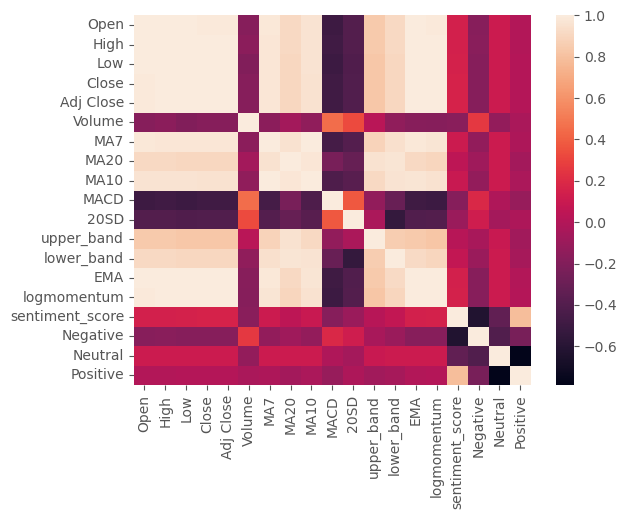

In [40]:
sns.heatmap(correlation)

In [41]:
merged_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Stock Name',
       'MA7', 'MA20', 'MA10', 'MACD', '20SD', 'upper_band', 'lower_band',
       'EMA', 'logmomentum', 'sentiment_score', 'Negative', 'Neutral',
       'Positive'],
      dtype='object')

In [42]:
scaled_df= merged_df[['MA7', 'MA20', 'MA10', 'MACD', '20SD', 'upper_band', 'lower_band',
       'EMA', 'logmomentum','sentiment_score', 'Negative', 'Neutral', 'Positive','Close']]

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_df[['MA7', 'MA20', 'MA10', 'MACD', '20SD', 'upper_band', 'lower_band',
       'EMA', 'logmomentum','sentiment_score', 'Negative', 'Neutral', 'Positive','Close']] = scaler.fit_transform(scaled_df[['MA7', 'MA20', 'MA10', 'MACD', '20SD', 'upper_band', 'lower_band',
       'EMA', 'logmomentum','sentiment_score', 'Negative', 'Neutral', 'Positive','Close']])

C:\Users\anike\AppData\Local\Temp\ipykernel_12124\3558349719.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_df[['MA7', 'MA20', 'MA10', 'MACD', '20SD', 'upper_band', 'lower_band',


In [44]:
scaled_df.describe()

,MA7,MA20,MA10,MACD,20SD,upper_band,lower_band,EMA,logmomentum,sentiment_score,Negative,Neutral,Positive,Close
count,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000
mean,0.506332,0.519811,0.503451,0.437052,0.290974,0.598076,0.493568,0.491129,0.540444,0.427891,0.240827,0.484492,0.447851,0.489699
std,0.305837,0.326598,0.316174,0.201810,0.204749,0.305476,0.318768,0.288444,0.280285,0.154383,0.158644,0.181888,0.174653,0.279845
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.213289,0.223560,0.192969,0.313268,0.126326,0.310303,0.149583,0.227603,0.301725,0.343735,0.134587,0.364899,0.345527,0.241808
50%,0.524522,0.608180,0.542051,0.436803,0.252800,0.712612,0.525479,0.492885,0.575824,0.427818,0.217289,0.505495,0.437884,0.502515
75%,0.795540,0.805541,0.798808,0.515849,0.381783,0.844327,0.757891,0.755774,0.794051,0.521003,0.325850,0.603268,0.547042,0.742759
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
features= scaled_df[['MA7', 'MA20', 'MA10', 'MACD', '20SD', 'upper_band', 'lower_band',
       'EMA', 'logmomentum','sentiment_score', 'Negative', 'Neutral', 'Positive']]
target = scaled_df['Close']  

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

## Using LSTM

In [49]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.regularizers import l2

In [50]:
features = ['MA7', 'MA20', 'MA10', 'MACD', '20SD', 'upper_band', 'lower_band',
       'EMA', 'logmomentum','sentiment_score', 'Negative', 'Neutral', 'Positive',]
target = 'Close'

# Feature scaler
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(merged_df[features])

# Target scaler
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(merged_df[[target]])

scaled_data = np.hstack((X_scaled, y_scaled)) 

In [51]:
print("scaler:", scaler)
print("type(scaler):", type(scaler))


scaler: MinMaxScaler()
type(scaler): <class 'sklearn.preprocessing._data.MinMaxScaler'>


In [52]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, :-1]) 
        y.append(data[i+seq_length, -1])   
    return np.array(X), np.array(y)

In [53]:
seq_length = 10  
X, y = create_sequences(scaled_data, seq_length)

In [54]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [62]:
from keras.layers import LSTM, Dense, Dropout, LayerNormalization
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(seq_length, X.shape[2])),
    LayerNormalization(),  # Normalization helps stabilize training
    Dropout(0.1),

    LSTM(32, return_sequences=False),
    Dropout(0.1),

    Dense(32, activation='relu'),
    Dense(1)  # Predicting a single continuous value (Close price)
])




C:\Users\anike\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [64]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [66]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [68]:
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test),callbacks=[early_stop])

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0746 - val_loss: 0.0591
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0237 - val_loss: 0.0247
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0179 - val_loss: 0.0283
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0245 - val_loss: 0.0121
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0157 - val_loss: 0.0368
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0198 - val_loss: 0.0242
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0122 - val_loss: 0.0134
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0117 - val_loss: 0.0131
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0122 - val_loss: 0.0120
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0092 - val_loss: 0.0193
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0105 - val_loss: 0.0121
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0132 

In [70]:
print("X_test shape:", X_test.shape)


X_test shape: (45, 10, 13)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 266ms/step


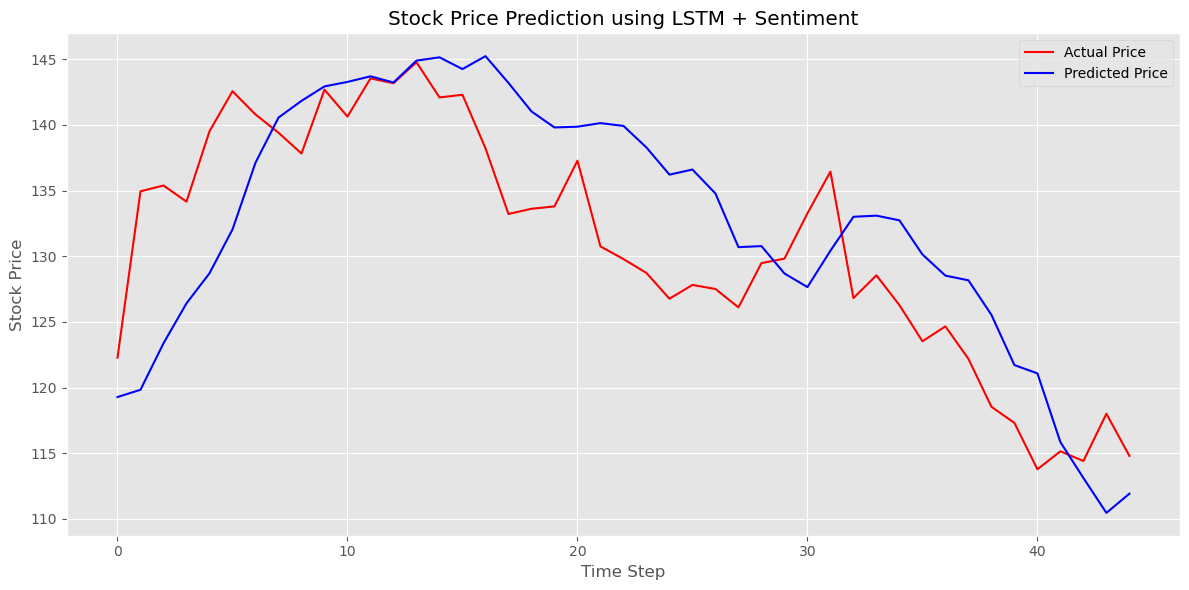

In [72]:
# 🧠 Predict stock prices
y_pred = model.predict(X_test)

# ✅ Extract the last timestep features (shape: [samples, 14])
last_features = X_test[:, -1, :]  # shape: (samples, 14)

# ✅ Append predictions as the 15th column
reconstructed_pred = np.concatenate((last_features, y_pred), axis=1)  # shape: (samples, 15)
reconstructed_true = np.concatenate((last_features, y_test.reshape(-1, 1)), axis=1)  # shape: (samples, 15)

# ✅ Inverse transform using the scaler (which was fit on 15 features)
y_pred_actual = scaler.inverse_transform(reconstructed_pred)[:, -1]
y_test_actual = scaler.inverse_transform(reconstructed_true)[:, -1]

# 📈 Plot actual vs predicted prices
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(len(y_test_actual)), y=y_test_actual, label='Actual Price', color='red')
sns.lineplot(x=range(len(y_pred_actual)), y=y_pred_actual, label='Predicted Price', color='blue')
plt.title("Stock Price Prediction using LSTM + Sentiment")
plt.xlabel("Time Step")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [74]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [76]:
print(mean_squared_error(y_test,y_pred))

0.006351610586019632


In [78]:
print(mean_absolute_error(y_test,y_pred))

0.06662212660102483


In [80]:
print(mean_squared_error(y_test,y_pred)**0.5)

0.07969699232731202


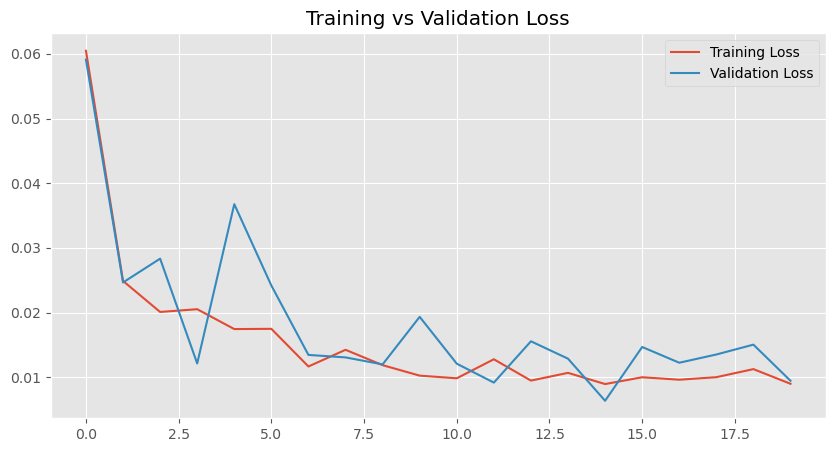

In [82]:
# Plot loss curve
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

In [84]:
import pickle
model.save("saved_model/lstm_stock_model.h5")
with open("saved_model/scaler_X.pkl", "wb") as f:
    pickle.dump(scaler_X,f)
with open("saved_model/scaler_y.pkl", "wb") as f:
    pickle.dump(scaler_y,f)

In [86]:
# Load scalers to check
with open("saved_model/scaler_X.pkl", "rb") as f:
    loaded_scaler_X = pickle.load(f)

with open("saved_model/scaler_y.pkl", "rb") as f:
    loaded_scaler_y = pickle.load(f)

# Test transform again
X_test_scaled = loaded_scaler_X.transform(merged_df[features])
y_test_scaled = loaded_scaler_y.transform(merged_df[[target]])


In [88]:
X_test_scaled.shape

(232, 13)